# Networks: structure, evolution & processes
**Internet Analytics - Lab 2 helper**

In this notebook, you can find snippets of Python code to help you solve the exercises of the lab.

---

### 2.2 Network Sampling

You can use the library [`requests`](http://docs.python-requests.org/en/master/) to extract information about a node as follows:

In [1]:
import requests

In [2]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'f30ff3966f16ed62f5165a229a19b319'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data)

{'friends': ['573fa358af72852d7d36e12ed90aff51', '0457a6051e65f746bfe894e3ae79557e', '5cb4178ee9f8a6ea16f7f26f3ebf6e09', '82eef85cd7ce3eae40f2c05bcca965c2', '966c890624bad6d0d807cf24c0b26963', '0ac278a84be299dc853aed249ee7528a', 'b8896e5f44795c509af3b7914339bddb', '8244778254179b4196d2c85f316bab38', '9fcf6ebe0f0760fe63b101fbe0f8eb07', 'c3e586a1b780b0bfac50d61c902f957a', 'b34f0b64b31020bffd2484b3740d982f', '4b14ee0d12780cbfe4726aa6be4a70fb', '019f45fc9ac03bdf6a0a52fc50b0d858', 'f6d2b80514bb808c016b203b42b506f8', '42e6c5748653be90304b93ac705c356a', '0072e9aaa29f1b57f619b03ef35350fd', '6d5032a8281e540e828ccf98ab6d3808', '1bf8f2b38cf1c753ea5f2601d229395a'], 'age': 19}


---

### 2.3 Epidemics

#### Simulation

We provide you with the module `epidemics_helper` including a Python class `SimulationSIR` to simulate epidemics. Read the documentation of the code if you have additional questions concerning its behavior.

In [7]:
import epidemics_helper
from networkx.readwrite import json_graph
import json

The `SimulationSIR` object can simulate continuous-time [SIR] epidemics propagating over a network. To initialize it, you need to provide 3 parameters:

* A graph `G` of type `networkx.Graph` over which the epidemic propagates,
* The parameter $\beta$ of type `float` corresponding to the rate of infection at which nodes infect their neighbors,
* The parameter $\gamma$ of type `float` corresponding to the rate at which nodes recover from the disease-

The graph `G` is assumed to have nodes labelled using using consecutive integers starting at $0$. This is the case for the graph `nyc_augmented_network.json` that we are using.

 [SIR]: https://en.wikipedia.org/wiki/Epidemic_model#The_SIR_model
 

In [8]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = read_json_file("data/nyc_augmented_network.json")

In [17]:
G.degree()[0]

2

/opt/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/opt/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


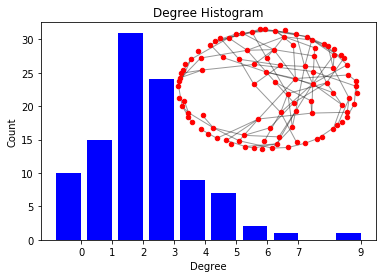

In [18]:


import collections
import matplotlib.pyplot as plt
import networkx as nx

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([G.degree()[i] for i in range(len(G.degree()))], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [ ]:
sir = epidemics_helper.SimulationSIR(G, beta=100.0, gamma=1.0)

To start the simulation, use the function `launch_epidemic` which takes as input the source node `source`, and the maximum duration `max_time` the epidemic needs to run for.

In [ ]:
sir.launch_epidemic(source=0, max_time=100.0)

You may want to extract the time of infection (resp. recovery) of each nodes, accessible by the `SimulationSIR` attribute `inf_time` (resp. `rec_time`). Both attribute are `Numpy` one-dimensional arrays of length $N$ (i.e. the number of nodes in the graph).

To get the infection time of node `i`, type:
```
sir.inf_time[i]
```
Similarly, to get the recovery time of node `i`, type:
```
sir.rec_time[i]
```
As stated before, the nodes are supposed to be labelled using using consecutive integers starting at $0$.

By default, if a node has not been infected (resp. recovered) then its infection (resp. recovery) time is set to `inf`.

In [ ]:
node_id = 123
print('Node: ', node_id)
print('Infection time: ', sir.inf_time[node_id]) 
print('Recovery time: ', sir.rec_time[node_id])